# 2. Clustering

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.manifold import TSNE
from sklearn import metrics

In [72]:
import warnings
warnings.filterwarnings("ignore")

In [73]:
import pyreadr

result = pyreadr.read_r('authors.rda') # also works for Rds

# done! let's see what we got
# result is a dictionary where keys are the name of objects and the values python
# objects
authors = result["authors"]
authors.index.name = 'author'
authors.reset_index(inplace=True)
authors["author"] = authors["author"].astype('category')
authors["code"] = authors[["author"]].apply(lambda x: x.cat.codes)

Compare and contrast several clustering methods including K-means, hierarchical clustering (with several linakages and distances) and spectral clustering. You may also wish to combine dimension reduction techniques with clustering. Which method is best at correctly grouping texts from the four authors? Report your clustering accuracy for each method and visualize your results. Interpret and reflect upon your results.

## K-Means

In [74]:
X = authors.drop(["author","code"], axis = 1)
kmeans = KMeans(n_clusters = 4, random_state = 0, n_init = "auto").fit(X)

In [75]:
model = TSNE(n_components=2, learning_rate='auto', init = 'random', perplexity = 3)
X_TSNE = model.fit_transform(X)

Text(0.5, 1.0, 'True Clusters by Author')

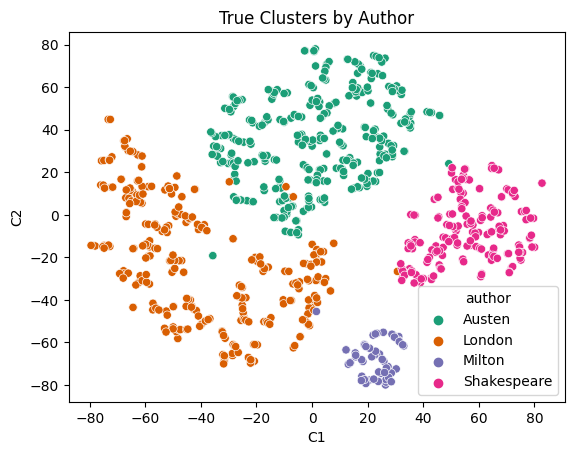

In [76]:
scatter1 = sns.scatterplot(x = X_TSNE[:,0:2][:,0], y = X_TSNE[:,0:2][:,1], hue = authors.author, palette ='Dark2')
scatter1.set_xlabel("C1")
scatter1.set_ylabel("C2")
scatter1.set_title("True Clusters by Author")

Text(0.5, 1.0, 'Predicted Clusters')

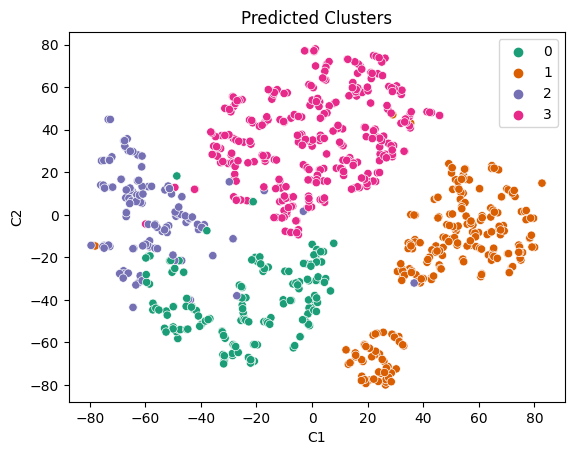

In [77]:
plt.figure()
scatter2 = sns.scatterplot(x = X_TSNE[:,0:2][:,0], y = X_TSNE[:,0:2][:,1], hue = kmeans.labels_, palette = 'Dark2')
scatter2.set_xlabel("C1")
scatter2.set_ylabel("C2")
scatter2.set_title("Predicted Clusters")


In [78]:
print(f"The rand index is {metrics.rand_score(kmeans.labels_, authors.code)}")
print(f"The adjusted rand index is {metrics.adjusted_rand_score(kmeans.labels_, authors.code)}")

The rand index is 0.8853858784893268
The adjusted rand index is 0.7245490688301763


## Spectral Clustering

In [79]:
clustering = SpectralClustering(n_clusters= 4, assign_labels='kmeans', affinity = 'nearest_neighbors').fit(X)

Text(0.5, 1.0, 'Predicted Clusters')

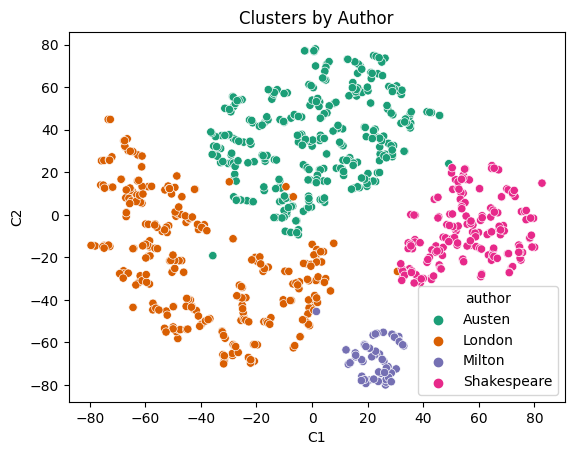

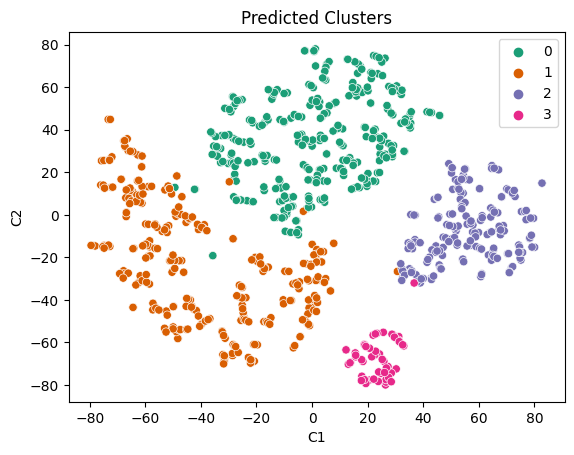

In [80]:
scatter1 = sns.scatterplot(x = X_TSNE[:,0:2][:,0], y = X_TSNE[:,0:2][:,1], hue = authors.author, palette ='Dark2')
scatter1.set_xlabel("C1")
scatter1.set_ylabel("C2")
scatter1.set_title("Clusters by Author")
plt.figure()
scatter2 = sns.scatterplot(x = X_TSNE[:,0:2][:,0], y = X_TSNE[:,0:2][:,1], hue = clustering.labels_, palette = 'Dark2')
scatter2.set_xlabel("C1")
scatter2.set_ylabel("C2")
scatter2.set_title("Predicted Clusters")

In [81]:
print(f"The rand index is {metrics.rand_score(clustering.labels_, authors.code)}")
print(f"The adjusted rand index is {metrics.adjusted_rand_score(clustering.labels_, authors.code)}")

The rand index is 0.9850065115225638
The adjusted rand index is 0.9650629515789122


## Heirarchical Clustering

### Using Complete Linkage

In [82]:
clustering = AgglomerativeClustering(n_clusters = 4, linkage = 'complete').fit(X)

Text(0.5, 1.0, 'Predicted Clusters')

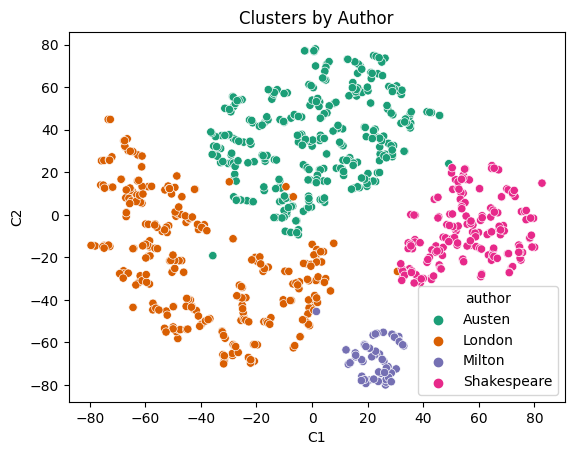

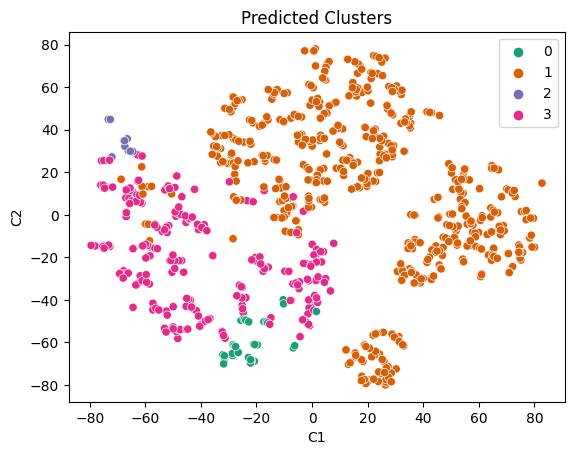

In [83]:
scatter1 = sns.scatterplot(x = X_TSNE[:,0:2][:,0], y = X_TSNE[:,0:2][:,1], hue = authors.author, palette ='Dark2')
scatter1.set_xlabel("C1")
scatter1.set_ylabel("C2")
scatter1.set_title("Clusters by Author")
plt.figure()
scatter2 = sns.scatterplot(x = X_TSNE[:,0:2][:,0], y = X_TSNE[:,0:2][:,1], hue = clustering.labels_, palette = 'Dark2')
scatter2.set_xlabel("C1")
scatter2.set_ylabel("C2")
scatter2.set_title("Predicted Clusters")

In [84]:
print(f"The rand index is {metrics.rand_score(clustering.labels_, authors.code)}")
print(f"The adjusted rand index is {metrics.adjusted_rand_score(clustering.labels_, authors.code)}")

The rand index is 0.6909036860879905
The adjusted rand index is 0.38869935043342774


### Using Single Linkage

Text(0.5, 1.0, 'Predicted Clusters')

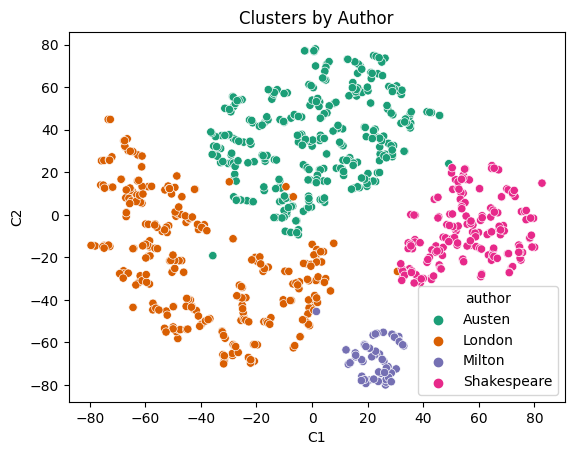

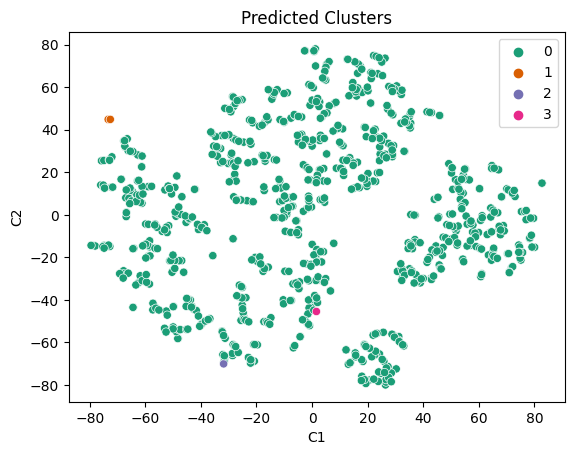

In [85]:
clustering = AgglomerativeClustering(n_clusters = 4, linkage = 'single').fit(X)
scatter1 = sns.scatterplot(x = X_TSNE[:,0:2][:,0], y = X_TSNE[:,0:2][:,1], hue = authors.author, palette ='Dark2')
scatter1.set_xlabel("C1")
scatter1.set_ylabel("C2")
scatter1.set_title("Clusters by Author")
plt.figure()
scatter2 = sns.scatterplot(x = X_TSNE[:,0:2][:,0], y = X_TSNE[:,0:2][:,1], hue = clustering.labels_, palette = 'Dark2')
scatter2.set_xlabel("C1")
scatter2.set_ylabel("C2")
scatter2.set_title("Predicted Clusters")

In [86]:
print(f"The rand index is {metrics.rand_score(clustering.labels_, authors.code)}")
print(f"The adjusted rand index is {metrics.adjusted_rand_score(clustering.labels_, authors.code)}")

The rand index is 0.31664684898929846
The adjusted rand index is 0.0006641728508948302


### Using Ward Linkage

Text(0.5, 1.0, 'Predicted Clusters')

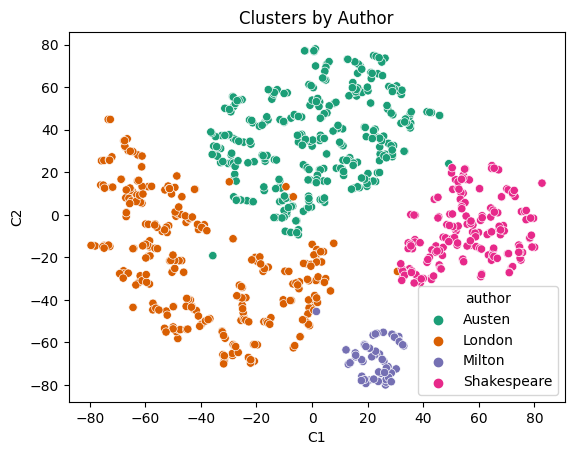

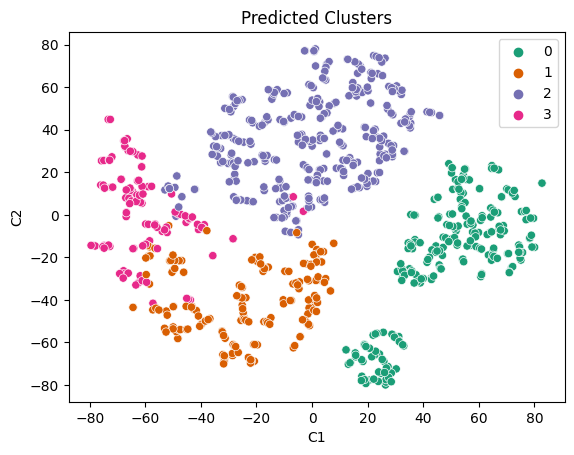

In [87]:
clustering = AgglomerativeClustering(n_clusters = 4, linkage = 'ward').fit(X)
scatter1 = sns.scatterplot(x = X_TSNE[:,0:2][:,0], y = X_TSNE[:,0:2][:,1], hue = authors.author, palette ='Dark2')
scatter1.set_xlabel("C1")
scatter1.set_ylabel("C2")
scatter1.set_title("Clusters by Author")
plt.figure()
scatter2 = sns.scatterplot(x = X_TSNE[:,0:2][:,0], y = X_TSNE[:,0:2][:,1], hue = clustering.labels_, palette = 'Dark2')
scatter2.set_xlabel("C1")
scatter2.set_ylabel("C2")
scatter2.set_title("Predicted Clusters")

In [88]:
print(f"The rand index is {metrics.rand_score(clustering.labels_, authors.code)}")
print(f"The adjusted rand index is {metrics.adjusted_rand_score(clustering.labels_, authors.code)}")

The rand index is 0.8870335768076553
The adjusted rand index is 0.7303040594438024


### Using Average Linkage

Text(0.5, 1.0, 'Predicted Clusters')

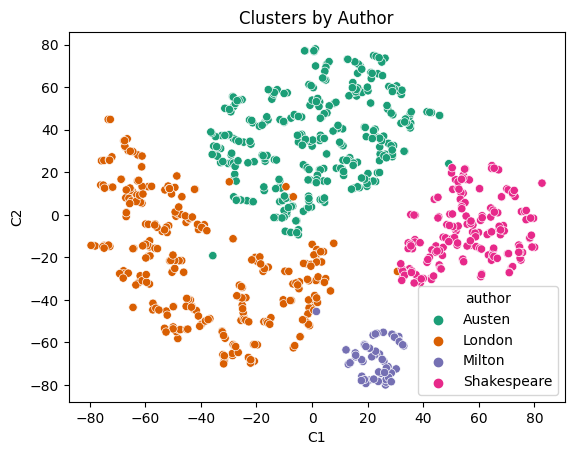

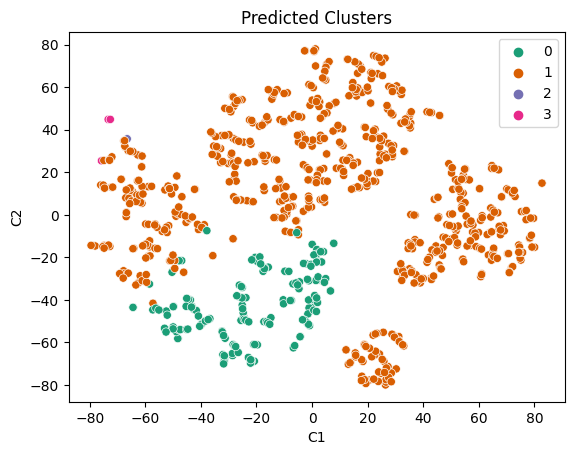

In [89]:
clustering = AgglomerativeClustering(n_clusters = 4, linkage = 'average').fit(X)
scatter1 = sns.scatterplot(x = X_TSNE[:,0:2][:,0], y = X_TSNE[:,0:2][:,1], hue = authors.author, palette ='Dark2')
scatter1.set_xlabel("C1")
scatter1.set_ylabel("C2")
scatter1.set_title("Clusters by Author")
plt.figure()
scatter2 = sns.scatterplot(x = X_TSNE[:,0:2][:,0], y = X_TSNE[:,0:2][:,1], hue = clustering.labels_, palette = 'Dark2')
scatter2.set_xlabel("C1")
scatter2.set_ylabel("C2")
scatter2.set_title("Predicted Clusters")

In [90]:
print(f"The rand index is {metrics.rand_score(clustering.labels_, authors.code)}")
print(f"The adjusted rand index is {metrics.adjusted_rand_score(clustering.labels_, authors.code)}")

The rand index is 0.4988449125191099
The adjusted rand index is 0.11932872444309345


Overall, the method with the best clustering accuracy was the spectral clustering method. This makes sense for several reasons. First, spectral clustering is simply a non-linear k-means clustering technique, so it is able to capture non-linear patterns and cluster accordingly within the data. This means that spectral clustering is more robust and understandably performs better than linear k-means or heirarchical clustering. Second, spectral techniques are able to really bring similar points very close and dissimilar points very far, hence with spectral clustering we can see that thsi method invokes more distinct separation between each class and illuminates patterns within the data better. Heirarchical clustering performed very poorly for most linkages other than ward, and possibly average and complete. We can see how with single linkage, chaining occured which resulted in most of the data classifying to one class. Both complete and average worked better than single, since our data has balanced classes, but both still had very poor results. Finally, ward worked best of all linkages since it is a variance minimizing approach and thus similar to k-means, which we can see performs relatively well even linearly and even better non-linearly with spectral clustering.